In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel("premiums_young_with_gr.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [3]:
df.shape

(20096, 14)

In [4]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount,Genetical_Risk
count,20096.000000,20096.000000,20096.000000,20096.000000,20096.000000
mean,21.494029,0.718004,22.506519,8141.941033,2.503881
std,2.294050,0.940767,23.418644,2749.609551,1.710115
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,21.500000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4


In [6]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [7]:
df.dropna(inplace= True)
# NA rows are too less, so drop it

In [8]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace= True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [12]:
df[df.number_of_dependants < 0].shape

(22, 14)

In [13]:
df[df.number_of_dependants < 0]['number_of_dependants'].unique()

array([-3, -1])

In [14]:
df['number_of_dependants']= abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

In [15]:
#numeric columns
numeric_columns= df.select_dtypes(['float64', 'int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

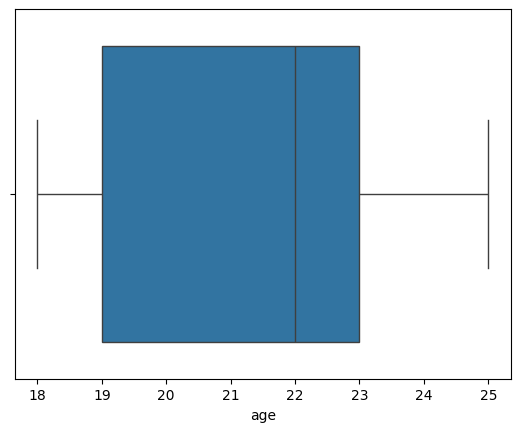

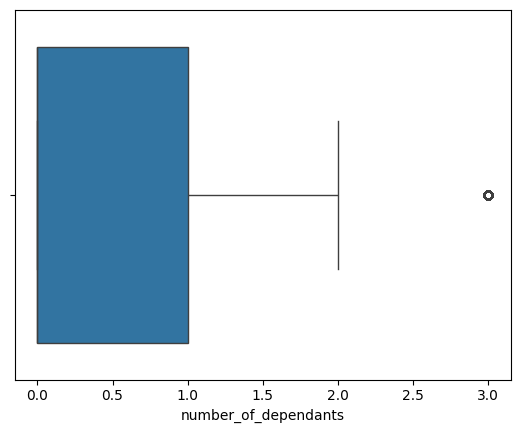

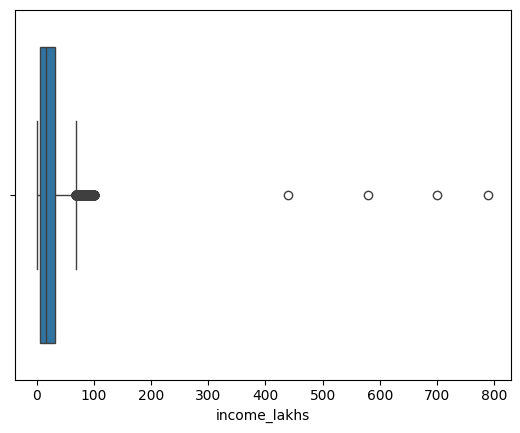

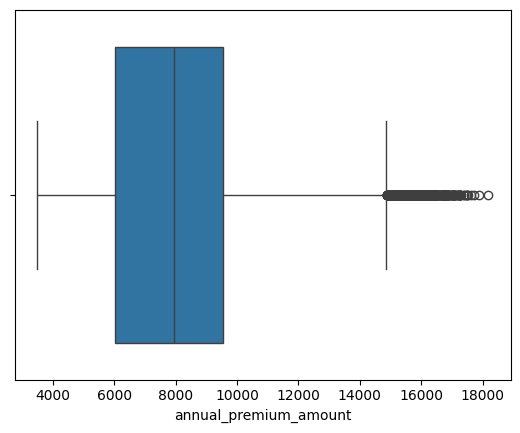

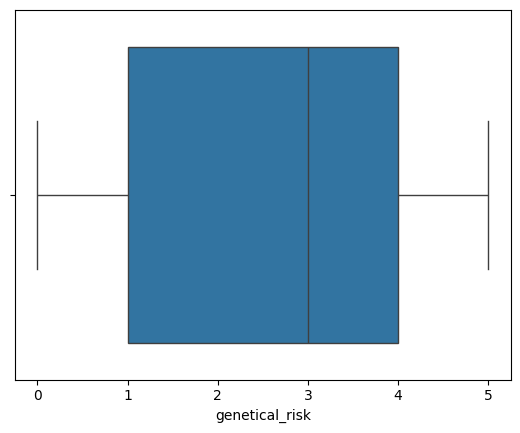

In [16]:
#To visualize outliers
for col in numeric_columns:
    sns.boxplot(x= df[col])
    plt.show()

In [17]:
df[df.age > 100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk


In [18]:
df[df.age > 100]['age'].unique()

array([], dtype=int64)

In [19]:
df1= df[df.age <= 100].copy()
df1['age'].describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

<Axes: xlabel='income_lakhs', ylabel='Count'>

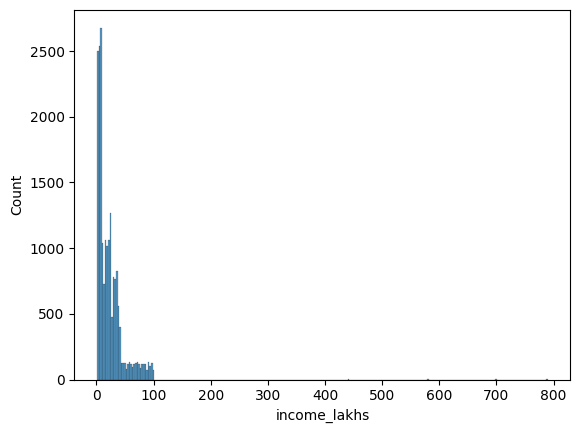

In [20]:
sns.histplot(df1.income_lakhs)

In [21]:
quantile_threshold= df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [22]:
df1[df1.income_lakhs > quantile_threshold]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
1677,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,440,No Disease,Silver,10636,3
4311,20,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,580,Thyroid,Silver,12888,5
4661,21,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,> 40L,700,No Disease,Bronze,7424,3
6251,21,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,> 40L,790,No Disease,Silver,7586,0


In [23]:
df2= df1[df1.income_lakhs <= quantile_threshold].copy()
df2["income_lakhs"].describe()

count    20086.000000
mean        22.390371
std         21.732062
min          1.000000
25%          6.000000
50%         16.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

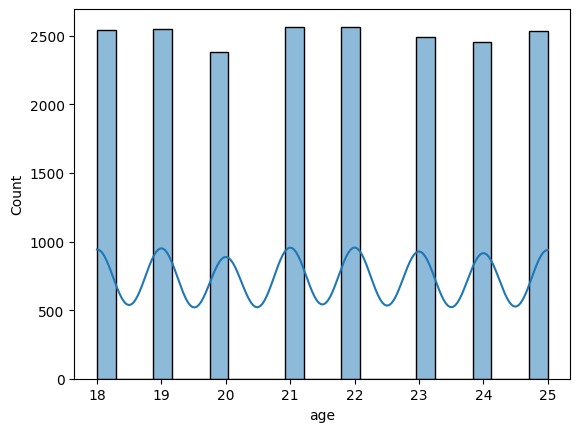

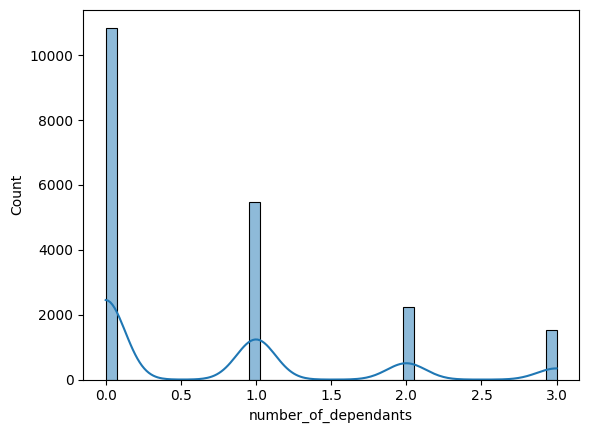

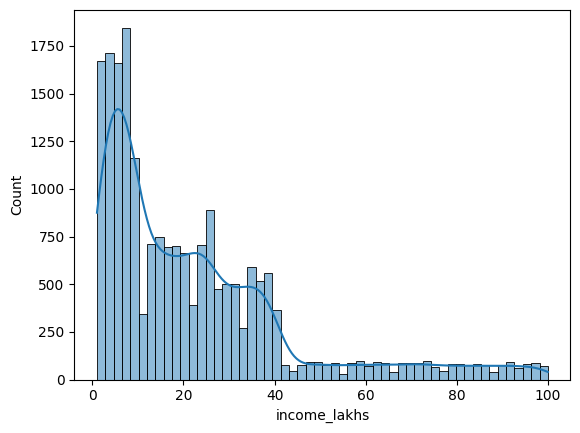

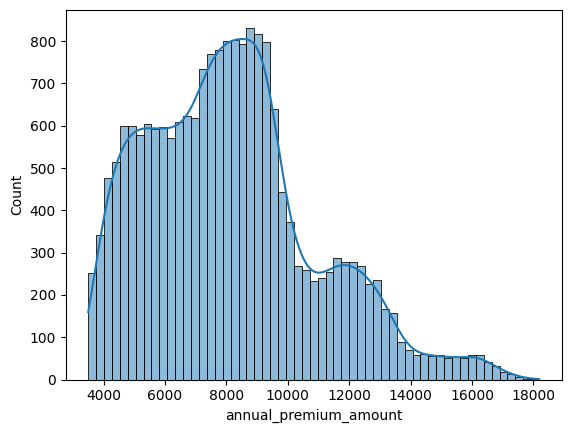

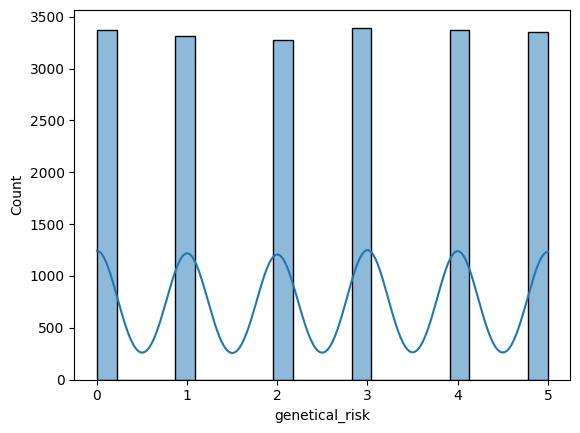

In [24]:
 for col in numeric_columns:
     sns.histplot(df2[col], kde= True)
     plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

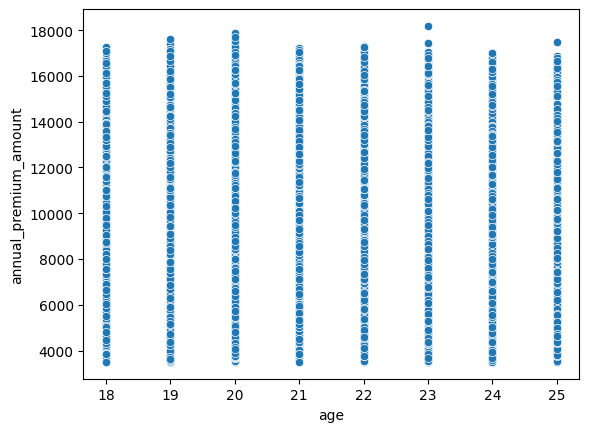

In [25]:
#bivariate
sns.scatterplot(df2, x= "age", y= "annual_premium_amount")

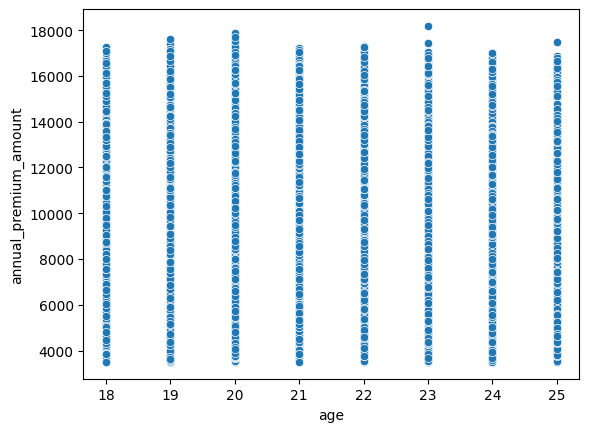

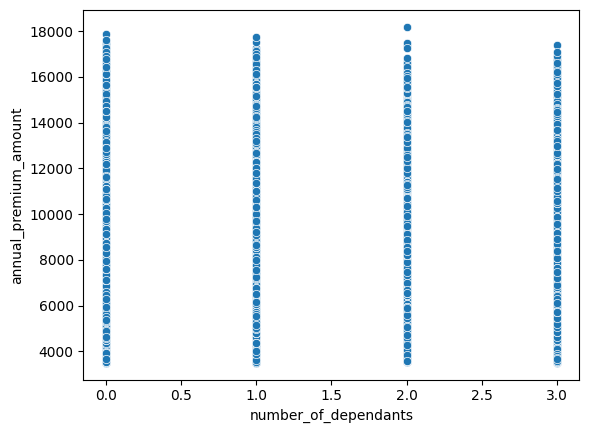

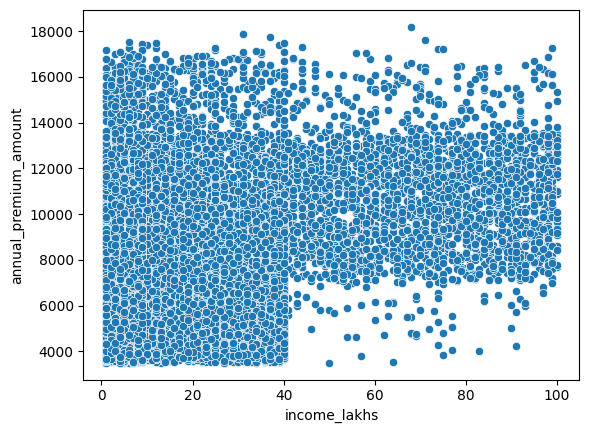

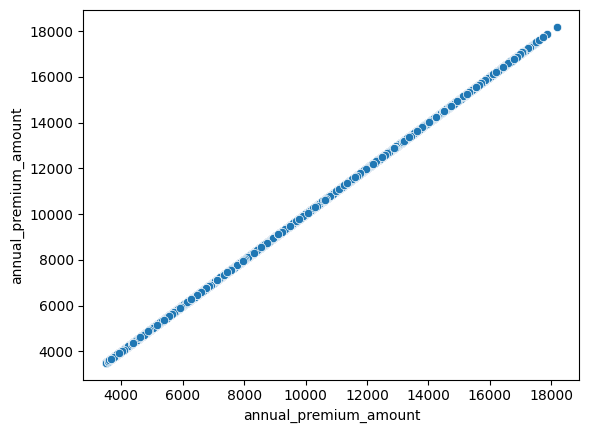

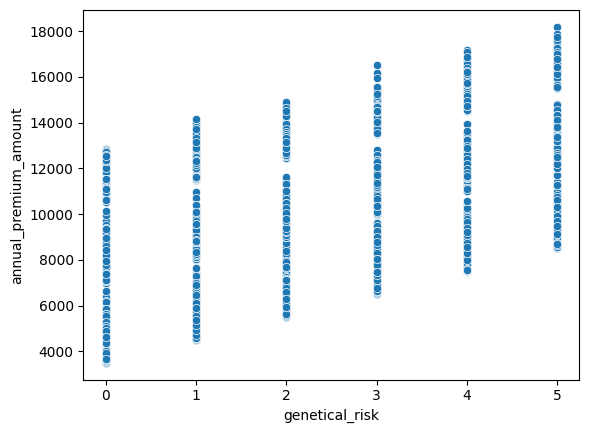

In [26]:
for col in numeric_columns:
    sns.scatterplot(df2, x= col, y= "annual_premium_amount")
    plt.show()


In [27]:
categorical_columns= df.select_dtypes(['object']).columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [28]:
for col in categorical_columns:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [29]:
df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
 'Not Smoking': 'No Smoking'
}, inplace= True)
df2['smoking_status'].unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14728\1678738820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [30]:
#Univariate analysis
count = df2['gender'].value_counts(normalize= True)
count

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64

In [31]:
count.index

Index(['Male', 'Female'], dtype='object', name='gender')

In [32]:
count.values

array([0.55038335, 0.44961665])

<Axes: xlabel='gender'>

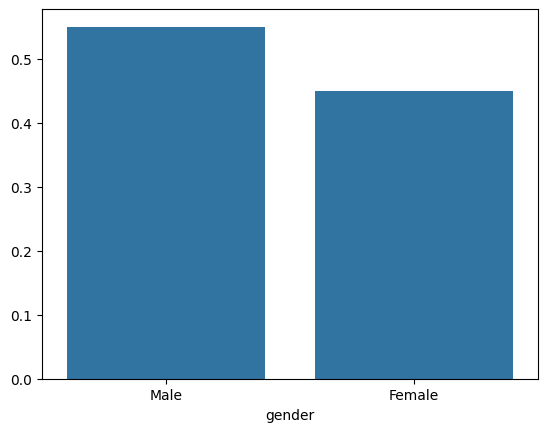

In [33]:
sns.barplot(x= count.index, y= count.values)

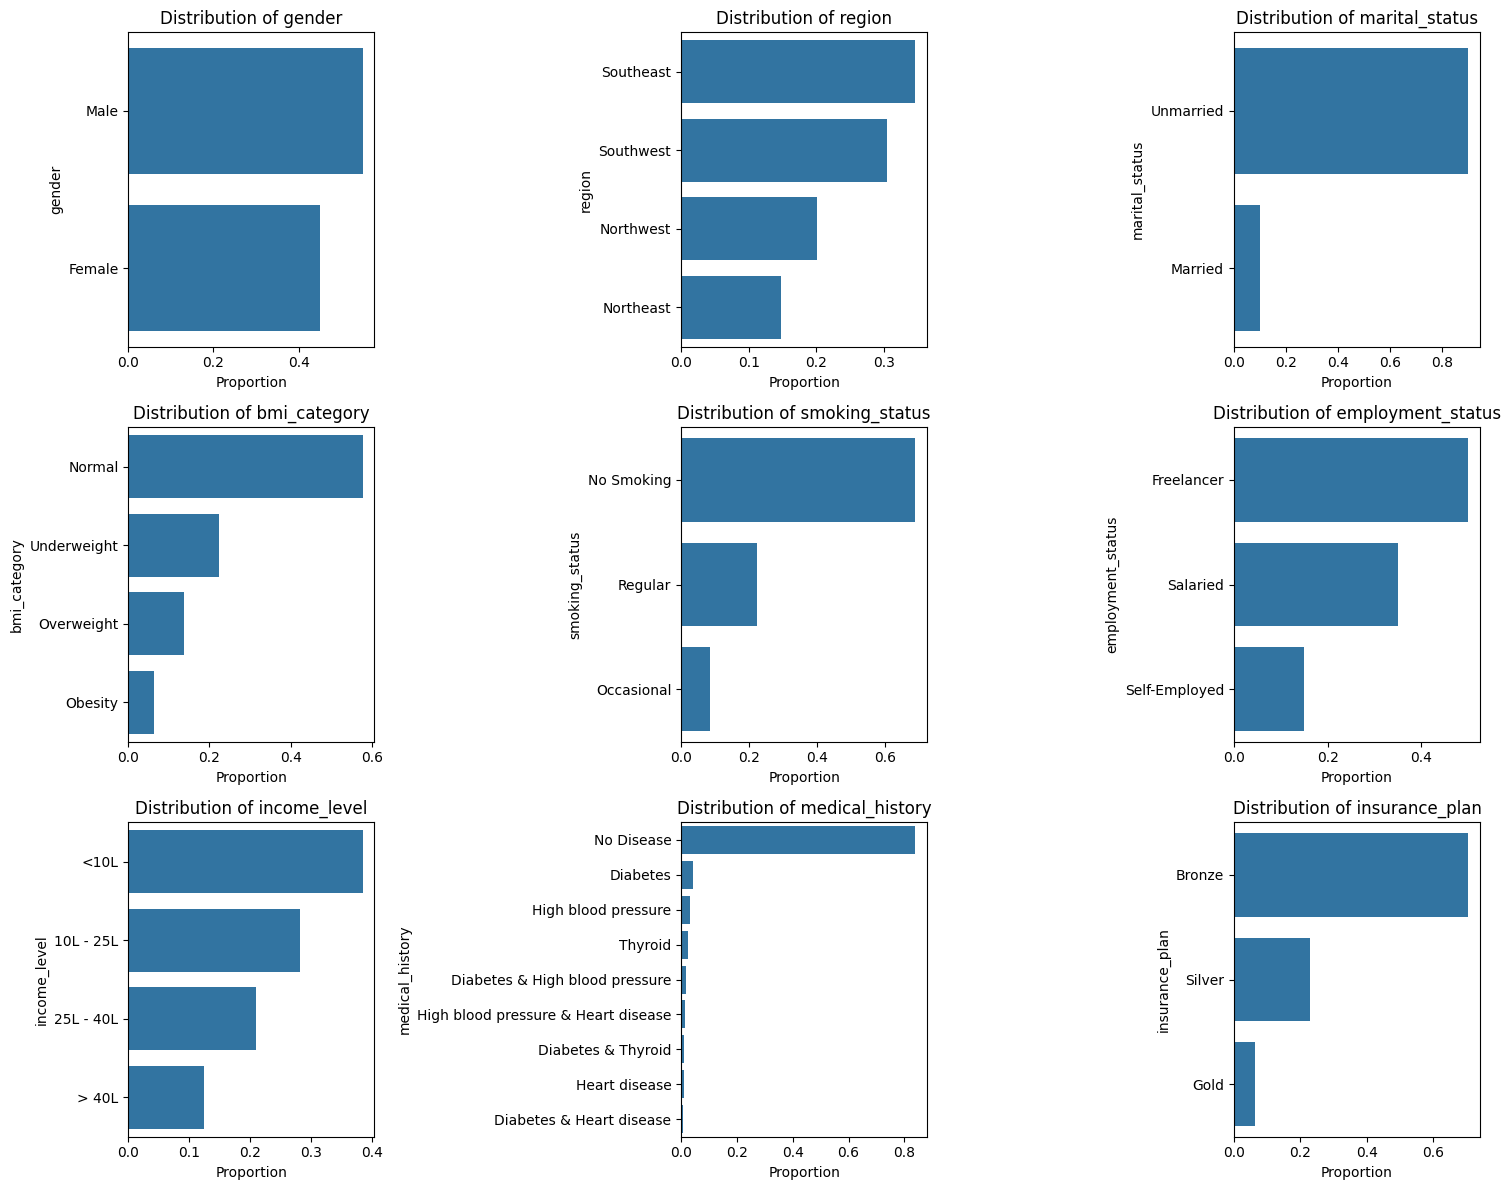

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid
axes = axes.flatten()

for i, col in enumerate(categorical_columns[:9]):  # Only up to 9 columns
    pct_count = df2[col].value_counts(normalize=True)
    sns.barplot(y=pct_count.index, x=pct_count.values, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Proportion')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


# for col in categorical_columns:
#     count= df2[col].value_counts(normalize= True)
#     sns.barplot(x= count.index, y= count.values)
#     plt.show()

In [35]:
crosstab= pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


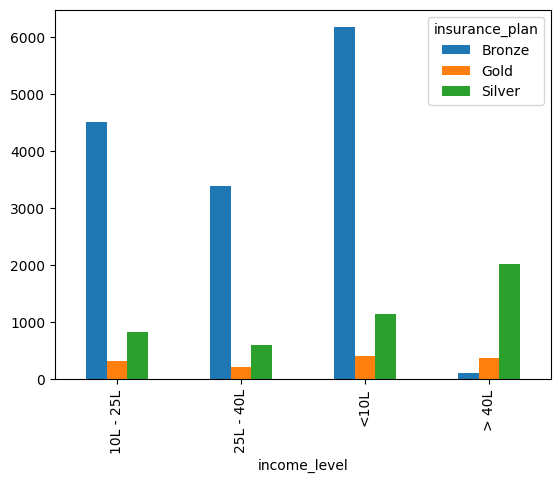

In [36]:
crosstab.plot(kind= "bar")
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

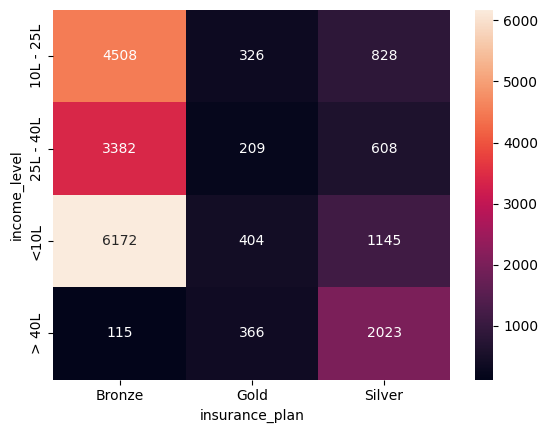

In [37]:
sns.heatmap(crosstab, annot=True, fmt= 'd')

<h3>Feature Engineering</h3>

In [38]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [39]:
df2['medical_history'].unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [40]:


risk_score= {
    'Diabetes': 6,
    'High blood pressure': 6,
    'No Disease': 0,
    'Thyroid': 5,
    'Heart disease': 8,
    'none': 0
}

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand= True)
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,High blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,No Disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,No Disease,None


In [41]:
df2['disease1'] = df2['disease1'].str.strip()
df2.head(2)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,High blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,No Disease,None


In [42]:
df2['disease2'] = df2['disease2'].str.strip()
df2.head(2)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,High blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,No Disease,None


In [43]:
df2['disease1'].fillna('none', inplace= True)
df2['disease2'].fillna('none', inplace = True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14728\927308995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace= True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14728\927308995.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [44]:
df2['total_risk_score']= 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_score)


df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,High blood pressure,none,6
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,No Disease,none,0


In [45]:
from sklearn.preprocessing import MinMaxScaler

scale= MinMaxScaler()
df2['normalized_risk_score']= scale.fit_transform(df2[['total_risk_score']])

df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,High blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,No Disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,No Disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,No Disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,No Disease,none,0,0.000000


In [46]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [47]:
df2['insurance_plan']= df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df2.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,4,High blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,2,11050,3,No Disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,2,11857,4,No Disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,1,5684,2,No Disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,1,5712,1,No Disease,none,0,0.000000


In [48]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [49]:
df2['income_level']= df2['income_level'].map({'<10L': 1, '10L - 25L': 2, '25L - 40L': 3, '> 40L': 4 })
df2.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,4,High blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,3,No Disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,4,No Disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,2,No Disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,1,No Disease,none,0,0.000000


In [50]:
nominal_columns= ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status','employment_status']
df_encode= pd.get_dummies(df2, columns= nominal_columns, drop_first= True, dtype= int)
df_encode.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,High blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,No Disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,No Disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,2,No Disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,1,No Disease,none,...,1,0,1,0,1,0,0,0,0,0


In [51]:
df_encode.drop(["medical_history", "disease1", "disease2", "total_risk_score"], axis= 1, inplace= True)


In [52]:
df_encode.dtypes

age                                  int64
number_of_dependants                 int64
income_level                         int64
income_lakhs                         int64
insurance_plan                       int64
annual_premium_amount                int64
genetical_risk                       int64
normalized_risk_score              float64
gender_Male                          int64
region_Northwest                     int64
region_Southeast                     int64
region_Southwest                     int64
marital_status_Unmarried             int64
bmi_category_Obesity                 int64
bmi_category_Overweight              int64
bmi_category_Underweight             int64
smoking_status_Occasional            int64
smoking_status_Regular               int64
employment_status_Salaried           int64
employment_status_Self-Employed      int64
dtype: object

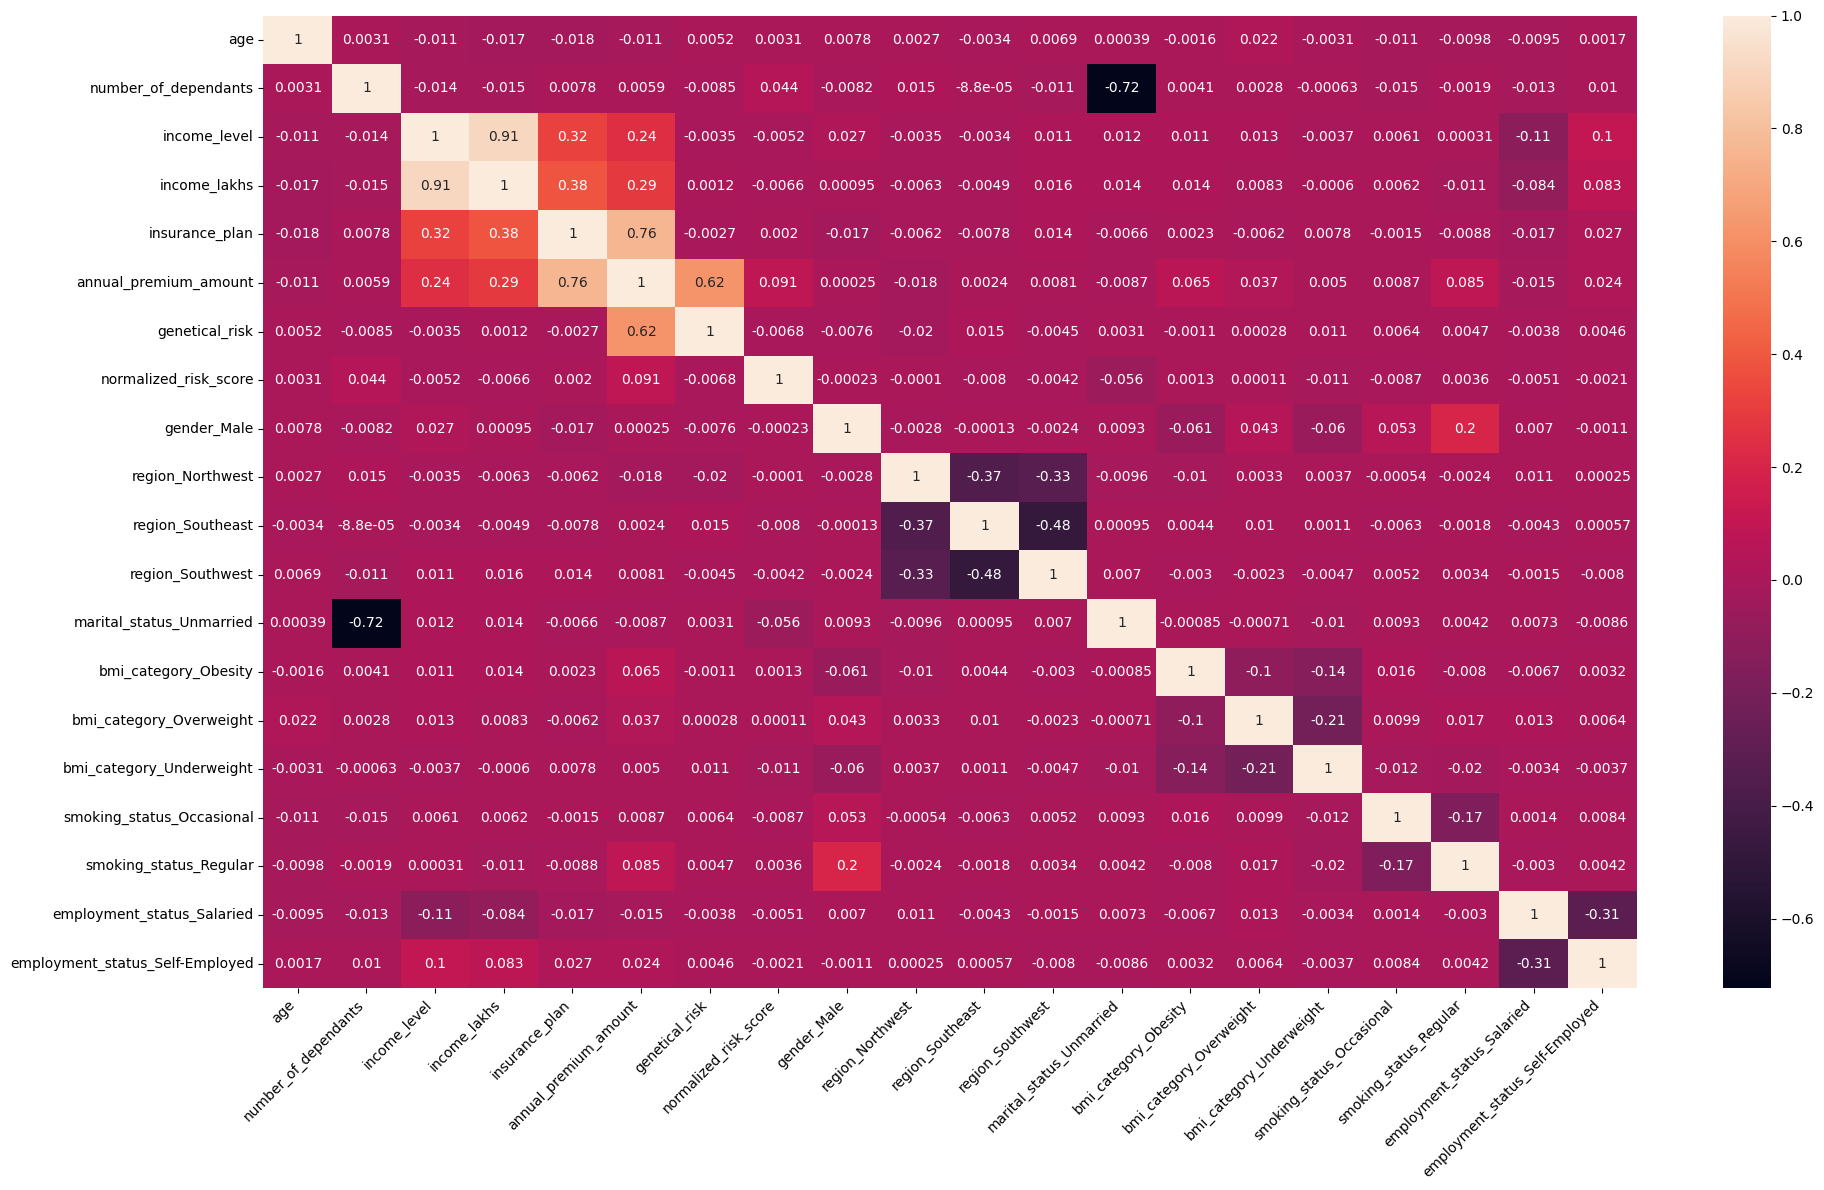

In [53]:

cm=df_encode.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [54]:
df_encode.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0


In [55]:
X= df_encode.drop("annual_premium_amount", axis= "columns")
y= df_encode["annual_premium_amount"]

from sklearn.preprocessing import MinMaxScaler
cols= ['age','number_of_dependants','income_level','income_lakhs','insurance_plan', 'genetical_risk']
scale= MinMaxScaler()

X[cols]= scale.fit_transform(X[cols])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):
    vif= pd.DataFrame()
    vif['Column']= data.columns
    vif['VIF'] =  [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif


In [57]:
calc_vif(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalized_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [58]:
calc_vif(X.drop('income_level',axis=1))

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalized_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [59]:
X.drop('income_level',axis=1, inplace= True)
X.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


<h3>Model Training</h3>

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 10)

X_train.shape

(14060, 18)

In [61]:
from sklearn.linear_model import LinearRegression

model_lr= LinearRegression()
model_lr.fit(X_train, y_train)

train_score = model_lr.score(X_train, y_train)
test_score= model_lr.score(X_test, y_test)

print(train_score, test_score)

0.988297900194864 0.9887263253056615


In [62]:
X.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.0,0.0,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [63]:
model_lr.intercept_


np.float64(3978.823528438257)

In [64]:
model_lr.coef_

array([-7.22903185e+00,  1.95361819e+01, -1.26452776e+00,  7.00112526e+03,
        4.99698873e+03,  1.10914836e+03,  8.17798831e+00,  1.67735268e+00,
       -3.27532710e+00,  6.31709531e+00,  1.60689716e+01,  8.12844929e+02,
        4.00375598e+02,  1.07529819e+02,  2.05069661e+02,  6.10983280e+02,
        3.87836470e-02, -5.24201812e+00])

In [65]:
feature_imp= model_lr.coef_

coef_df= pd.DataFrame(feature_imp, index= X_test.columns, columns= ["Coefficients"])
coef_df= coef_df.sort_values(by= "Coefficients", ascending= True)
coef_df

,Coefficients
age,-7.229032
employment_status_Self-Employed,-5.242018
region_Southeast,-3.275327
income_lakhs,-1.264528
employment_status_Salaried,0.038784
region_Northwest,1.677353
region_Southwest,6.317095
gender_Male,8.177988
marital_status_Unmarried,16.068972
number_of_dependants,19.536182


<Axes: xlabel='Coefficients', ylabel='None'>

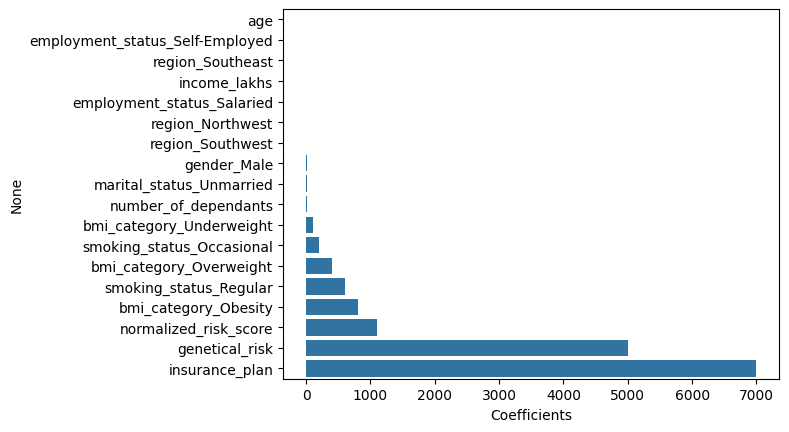

In [66]:
sns.barplot(y=coef_df.index,x=coef_df['Coefficients'])

In [67]:
from sklearn.linear_model import Ridge, Lasso

ridge= Ridge()
ridge.fit(X_train, y_train)

train_score= ridge.score(X_train, y_train)
test_score= ridge.score(X_test, y_test)
train_score, test_score

(0.9882972960153418, 0.9887275909694276)

In [68]:
from xgboost import XGBRegressor

xgb= XGBRegressor()
xgb.fit(X_train, y_train)

train_score= xgb.score(X_train, y_train)
test_score= xgb.score(X_test, y_test)
train_score, test_score


(0.9925054907798767, 0.987729549407959)

In [69]:
from sklearn.metrics import  mean_squared_error, r2_score, root_mean_squared_error
y_pred= xgb.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print("mse: ",mse, ", r2_score: ", r2)

mse:  93312.703125 , r2_score:  0.987729549407959


In [70]:
from sklearn.model_selection import RandomizedSearchCV

xgb= XGBRegressor()

params= {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

model = RandomizedSearchCV(xgb, params, n_iter= 10, cv= 3, scoring='r2')
model.fit(X_train, y_train)
model.best_score_

np.float64(0.9885703126589457)

In [71]:
model.best_params_

{'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.2}

In [72]:
best_model= model.best_estimator_

In [73]:
feature_imp= best_model.feature_importances_

coef_df= pd.DataFrame(feature_imp, index= X_test.columns ,columns=['Coefficients'])
coef_df= coef_df.sort_values(by= "Coefficients", ascending= True)
coef_df



,Coefficients
region_Northwest,0.000077
gender_Male,0.000120
number_of_dependants,0.000123
age,0.000125
region_Southwest,0.000136
marital_status_Unmarried,0.000140
region_Southeast,0.000151
income_lakhs,0.000153
employment_status_Salaried,0.000159
employment_status_Self-Employed,0.000169


<Axes: xlabel='Coefficients', ylabel='None'>

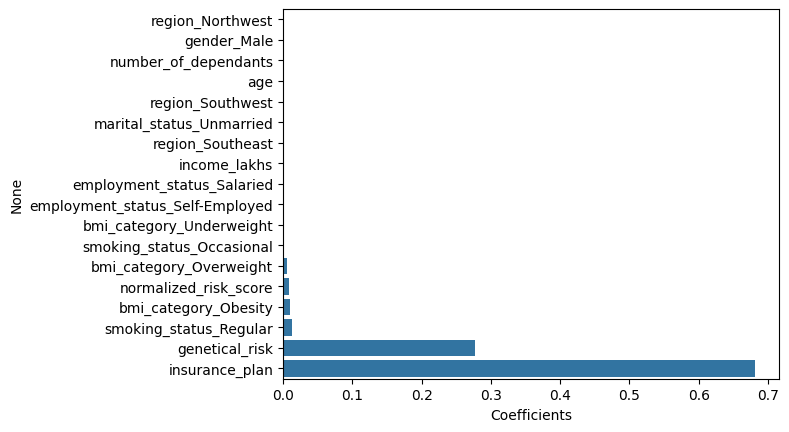

In [74]:
sns.barplot(y=coef_df.index,x=coef_df['Coefficients'])

<h3>Error Analysis</h3>

In [75]:
y_pred= best_model.predict(X_test)

residuals= y_pred- y_test
residuals_pct= residuals* 100/ y_test

results_df= pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
})

results_df.head()

,actual,predicted,diff,diff_pct
12774,6238,6100.352539,-137.647461,-2.206596
14758,9462,9612.002930,150.002930,1.585319
13205,5152,5582.970703,430.970703,8.365115
14278,6988,7439.339355,451.339355,6.458777
19351,4917,5103.975098,186.975098,3.802626


<Axes: xlabel='diff_pct', ylabel='Count'>

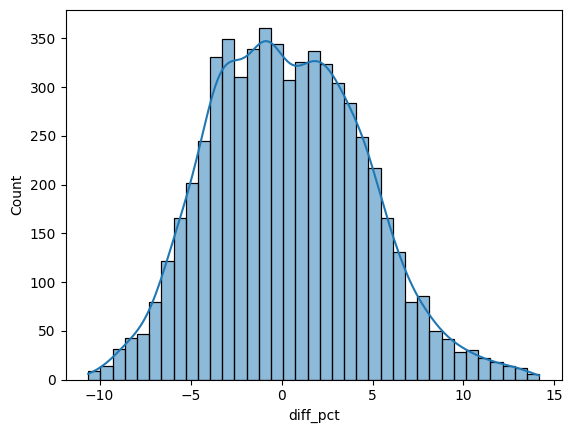

In [76]:
sns.histplot(results_df['diff_pct'], kde= True)

In [77]:
#should not have error more than 10pct
import numpy as np
extreme_error_threshold= 10

results_df_extreme= results_df[np.abs(results_df.diff_pct) > extreme_error_threshold]
results_df_extreme.shape

(114, 4)

In [78]:
results_df_extreme.shape[0]*100/ results_df.shape[0]

1.8918021905077995

</h3>Export the Model<h3>

In [79]:
from joblib import dump

dump(best_model, "artifacts/model_young.joblib")



['artifacts/model_young.joblib']

In [80]:
scaler_with_cols= {
    'scaler': scale,
    'cols': cols
}
scaler_with_cols

dump(scaler_with_cols, "artifacts/scaler_young.joblib")

['artifacts/scaler_young.joblib']